# Problem Set: Week 2

In [4]:
# Start your problem set by importing the following if you haven't already
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1: Boolean Search Result List

In [9]:
def boolean_list(arr1, arr2, barr):
    """(np.array, np.array, np.array) -> None 
    Given 3 np arrays, for each value in the first one, if the value is
    also in the second one (but not necesarrily at the same spot) change
    the value of barr at the index of the first array from 0 -> 1. 
    
    Assume that barr is originally all zeros. arr1 and arr2 may have different lenths
    but barr should have the same length as arr1.
    
    This function should not return anything. It should modify the array barr. 
    It should not modify arr1 or arr2.
    
    Examples:
    >>> arr1 = np.array([5, 2, 3, 6])
    >>> arr2 = np.array([6, 2, 9])
    >>> barr = np.zeros(len(arr1))
    >>> boolean_list(arr1, arr2, barr)
    >>> barr
    np.array([0, 1, 0, 1])
    """
    for i in range(len(arr1)):
        for j in range(len(arr2)):
            if arr1[i] == arr2[j]:
                barr[i] = 1
    
    
arr1 = np.array([5, 2, 3, 6])
arr2 = np.array([6, 2, 9])
barr = np.zeros(len(arr1))
boolean_list(arr1, arr2, barr)
barr 

array([ 0.,  1.,  0.,  1.])

## Q2: Linear Equations and Fitting Data

### Part 1:
In this question, we will manually calculate the parameters for a linear least square fit (for a straight line). Don't worry if you don't fully understand the math, just work through the coding parts of the questions. All the necessary mathematics/formula are given, you just have to convert them to code.

In matrix notation, the equation for the best fit line of a function in terms of two paraemters, $m$ and $b$ when we have measured $n$ data points is:

$$
\begin{bmatrix}
    y_1 \\
    y_2
\end{bmatrix}
= 
\begin{bmatrix}
    1 & x_1 \\
    1 & x_2
\end{bmatrix}
\begin{bmatrix}
    b \\
    m
\end{bmatrix}
$$

To solve this matrix equation we must solve the expression:

$$ 
\begin{bmatrix}
    b \\
    m
\end{bmatrix}
 = (X^T X)^{-1} X^T 
 \begin{bmatrix}
    y_1 \\
    y_2
\end{bmatrix}
$$

Where X is the matrix of measured values and ones shown above and $y_1$, $y_2$ are the measured y values.

Write a function that takes in the matrix and the vector and returns a list [b, m]. You should use numpy functions to perform the operations on the matrix since operations such as inverse are fairly difficult to code by hand.

In [55]:
def find_params(X, y):
    """
    Solve the matrix equation listed above and return a list: [b, m]
    """
    xt = X.T
    xtXinv_xt = np.linalg.inv(xt @ X) @ xt
    return xtXinv_xt.dot(y)
    
    
# Once you have written the function, text it with this matrix and vector. 
# Store the value b and m as a variable for the next step.
x = [3.2, 6.7, 2.3, 5.2, 4.7]
X = np.array([[1, i] for i in x])
y = np.array([8.4, 20.3, 7.1, 16.3, 13.8])

b, m = find_params(X, y)
b, m

(-0.80921806538588004, 3.1649814627569866)

### Part 2:

Now that you have the values $b$ and $m$, write the following in Python as a function of $b$, $m$ and $x$.

$$ f(x, b, m) = mx + b $$

In [56]:
# Write the function as a Python function like 
# we did when we did when we did root finding.
def f(x, b, m):
    return m*x + b

Finally, we want to plot our "data" and the fit we just manually calculated. I have given you the scatter plot of the "data", now add to it a plot that plots some x values vs the fit function you just created at those values. 

Hint: Use np.linspace(...) to generate your x values.

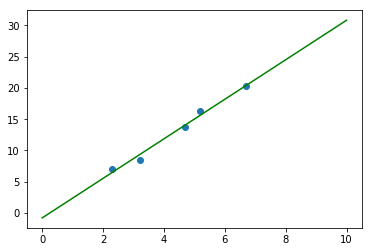

In [57]:
x_rng = np.linspace(0, 10, 100)

# Starter code to make the plot
fig, ax = plt.subplots()
ax.scatter(x, Y)
ax.plot(x_rng, f(x_rng, b, m), 'g')

## Q3: Numerical Derivatives

### Part 1:

Define a function, F, of which you will later take the numerical derivative. You can make it any function you want but I suggest you start with something simple. My solution, posted later will be for $F(x) = x^2$ as we used in the root finding method so you can start with that and try changing it after.

In [51]:
### Define your function
def F(x):
    return x**2

### Part 2:

Now write a function that takes in your function above, the point we are evaluating at and the "time step" $h$ and calculate the **numerical** derivative.

In mathematical terms, we want a numerical solution for:

$$ \left(\frac{\mathop{d}}{\mathop{dx}} F(x)\right)_{x = a} $$

Hint: Recall the formalism of the derivative in terms of limits from first year calculus (ie MATA30 or equivalent). Solve this for small $h$ instead of the limit as it goes to 0.

In [52]:
def deriv(F, a, h):
    """
    Calculate the numerical derivative of F(x) evaluated at a.
    """
    return (F(a + h) - F(a)) / h

### Part 3:

Now take the numerical derivative at a point and plot it along with the function itself to show it is indeed tangent to the curve at that point. Take different values of h to see how the line changes.

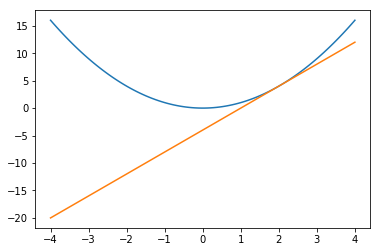

In [54]:
def deriv_plot(F, x, slope, a):
    """
    Given that the slope is evaluated at a, plot it
    tangentially at this point.
    """
    b = - F(a)
    return slope*x + b

a = 2
h = 0.0001
slope2 = deriv(F, a, h)


x = np.linspace(-4, 4, 100)
y = F(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, deriv_plot(F, x, slope2, a))

### Bonus (Part 4):

If you want an extra challenge, use your numerical derivative method above to improve the bisection method by taking the interpolated derivative instead of the actual midpoint. This then becomes Newton's Method (which you have seen in calculus). Compare the error at different numbers of iterations to see that it does converge faster. 